### 02. Import Libraries, including all scikit-learn tools

In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Get path

cdir = os.getcwd() 
print("Current Directory: ", cdir) 
print("Parent Directory: ", os.path.dirname(cdir))

Current Directory:  C:\Users\Megan\Documents\Analytics\Gun Violence Achievement 6\03 Scripts
Parent Directory:  C:\Users\Megan\Documents\Analytics\Gun Violence Achievement 6


In [3]:
path = r'C:\Users\Megan\Documents\Analytics\Gun Violence Achievement 6'

In [4]:
# Import Data Frame 

df = pd.read_csv(os.path.join(path, '02 Data','Raw Data','Geo_region_data.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,Geographic_Region
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,East
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,West
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,East
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Middle
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,East


### 03. Clean data to prepare for analysis

In [6]:
# Remove unnamed column 

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,Incident_id,Date,State,City_or_County,#_killed,#_injured,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,Geographic_Region
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,East
1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,West
2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,East
3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020,1.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Middle
4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,East


In [8]:
# Check for missing values 

df.isnull().sum()

Incident_id                  0
Date                         0
State                        0
City_or_County               0
#_killed                     0
#_injured                    0
latitude                     0
longitude                    0
n_guns_involved              0
participant_age_group    40872
participant_gender       35313
Geographic_Region            0
dtype: int64

#### Missing values were addressed in last exercise. Since the participant columns are unstructured data, the missing values were disregarded.

In [9]:
# Check for duplicate values 

dups = df.duplicated()

In [10]:
dups.shape # No duplicate values

(230790,)

### 04. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

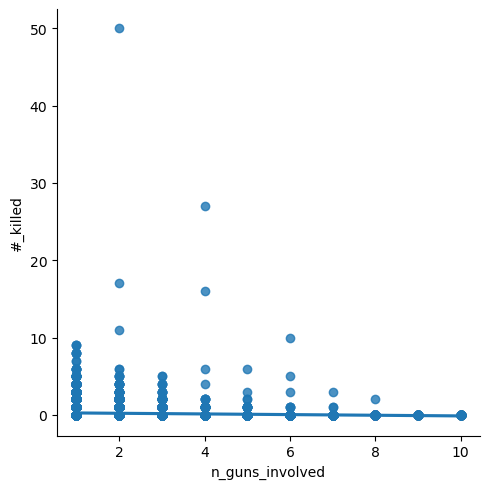

In [11]:
sns.lmplot(x = 'n_guns_involved', y = '#_killed', data = df)
plt.show()

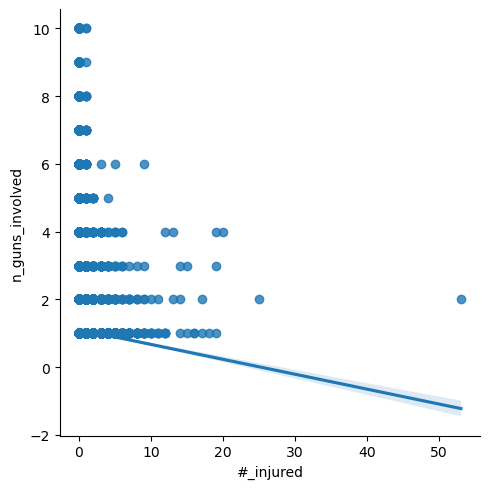

In [12]:
sns.lmplot(x = '#_injured', y = 'n_guns_involved', data = df) 
plt.show()

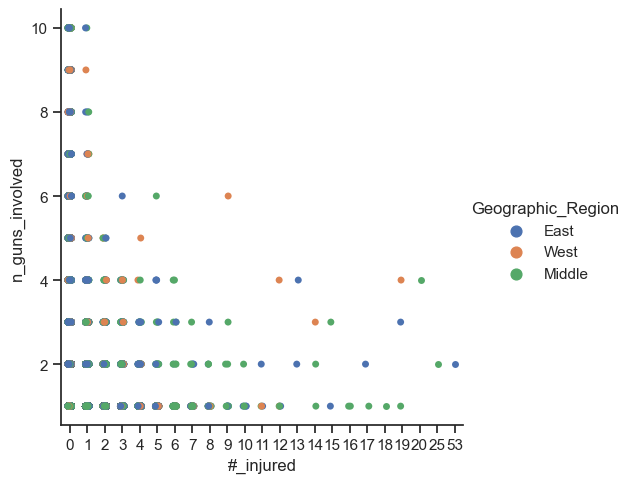

In [13]:
# Create plot to show relationship by region

sns.set(style = 'ticks') 
sns.catplot(x='#_injured', y='n_guns_involved', hue='Geographic_Region', data=df) 
plt.show()

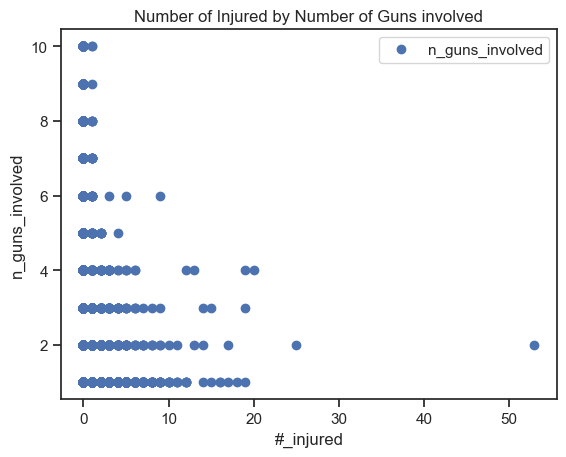

In [14]:
df.plot(x = '#_injured', y='n_guns_involved',style='o')
plt.title('Number of Injured by Number of Guns involved')  
plt.xlabel('#_injured')  
plt.ylabel('n_guns_involved')  
plt.show()

In [15]:
# Create new data frame to eliminate #_injured outlier 

df_new = df.loc[df['#_injured'] <= 40]

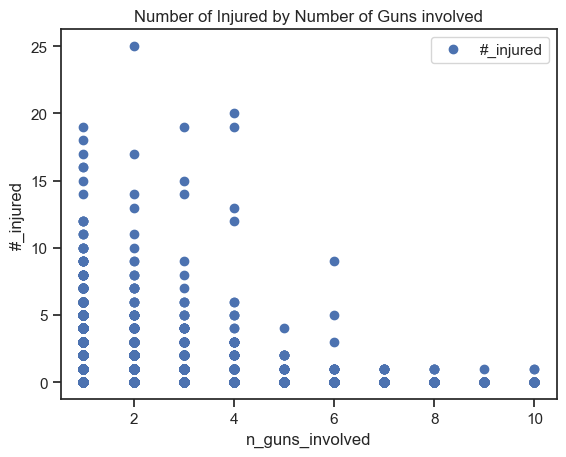

In [16]:
# Create new plot 

df_new.plot(x = 'n_guns_involved', y='#_injured',style='o')
plt.title('Number of Injured by Number of Guns involved')  
plt.xlabel('n_guns_involved')  
plt.ylabel('#_injured')  
plt.show()

### 05. State your Hypothesis 

#### The fewer guns that are involved in the incident, the more people that will be injured.

### 06. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_new['#_injured'].values.reshape(-1,1)
y = df_new['n_guns_involved'].values.reshape(-1,1)

In [18]:
X

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [19]:
y

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

### 07. Split the data into two sets: a training set and a test set

In [20]:
# 0.3 specifies that 30% of the data will be test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### 08. Run a linear regression on the data

#### First, fit model on the training set

In [21]:
# Create regression

regression = LinearRegression()

In [22]:
# Put regression on training set 

regression.fit(X_train, y_train)

LinearRegression()

#### Then, create a prediction for y on the test set

In [23]:
y_predicted = regression.predict(X_test)

In [24]:
y_predicted

array([[1.11031245],
       [1.11031245],
       [1.06513563],
       ...,
       [1.11031245],
       [1.11031245],
       [1.11031245]])

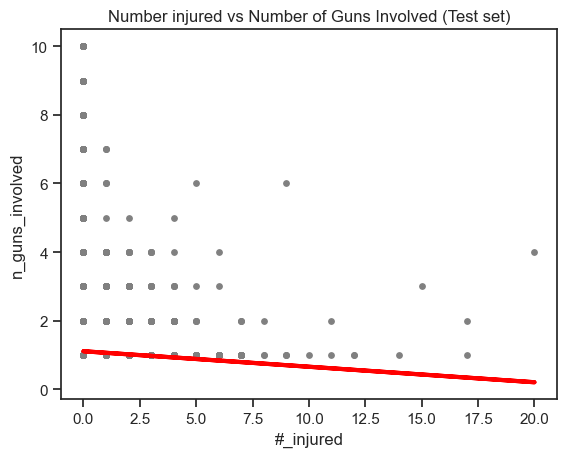

In [25]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number injured vs Number of Guns Involved (Test set)')
plot_test.xlabel('#_injured')
plot_test.ylabel('n_guns_involved')
plot_test.show()

### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### The regression line doesn't fit the data on the scatterplot at all. Since the line is almost flat, this indicates that there is little to no relationship between the two variables.

### 11. Check the model performance statistics—MSE and R2 score

In [26]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.04517683]]
Mean squared error:  0.27424072420575657
R2 score:  0.003984309648879081


### 12. Compare the predicted y values with the actual y values in a dataframe

In [28]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,1.110312
1,1.0,1.110312
2,1.0,1.065136
3,1.0,1.110312
4,1.0,1.110312
5,1.0,1.065136
6,1.0,1.019959
7,1.0,1.019959
8,1.0,1.110312
9,1.0,1.065136


### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

#### The model theoretically performed alright, considering how small the mean squared error is. However, the R2 score was very close to 0, indicating that it is a poor fit. This could be because the overall number of incidents had 1-2 guns involved, so the number of guns is a poor predictor of how many people will be injured in an incident. 

In [30]:
# Export dataframe 

df_new.to_csv(os.path.join(path,'02 Data', 'Raw Data','regression_data.csv'))